# Research project - Distributed deep learning with Pythorch

## Local version

### AI Specialization University Minuto de Dios

#### Made by: Michael Andrés Mora Poveda

Objective:

The aim of this notebook is apply convolutional neural networks to train a multiclassifier with CIFAR-10 dataset 
in local version and with Pytorch deep learning framework. Moreover, it's important taking into account that other
purpose is calculate the time processing to contrast it with on-cloud distributed version on Azure.

All the descriptions and explanations about this dataset could be find in the following url:

**https://www.cs.toronto.edu/~kriz/cifar.html**



##### 1. Import the respective packages:

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import time
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

##### 2. Parameterize the transformations to normalize the images:

In [2]:
# Transformaciones y carga del conjunto de entrenamiento
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


##### 3. Import the dataset directly from Pytorch dataset module and apply the data loader function to save all the files into data folder:

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=False, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


##### 4. Define the labels to each one of the categories and confirm the datasets size:

In [4]:
print("Train set size: {} images".format(len(trainset)))
print("Test set size: {} images".format(len(testset)))

Train set size: 50000 images
Test set size: 10000 images


In [5]:
# Clases del CIFAR-10
classes = ('avion', 'automovil', 'pajaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camion')

##### 5. Define the Net class to instiate the convolutional neural network:

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


##### 6. Instantiate the loss functions and learning rate:

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

##### 7. Train the model with 30 epochs:

In [8]:
start_time = time.time()

num_epochs = 90

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs, 1)  # Obtén las clases predichas
        

        # print statistics
        running_loss += loss.item()
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)  # El tamaño del lote (batch)
            
    epoch_accuracy = correct_predictions / total_samples
    print(f'Epoch {epoch + 1}/{num_epochs} : [==============================] - Loss: {running_loss:.4f} - Accuracy: {epoch_accuracy:.4f}')


Epoch 1/90 : [==============================] - Loss: 900.0748 - Accuracy: 0.1009
Epoch 2/90 : [==============================] - Loss: 896.3551 - Accuracy: 0.1203
Epoch 3/90 : [==============================] - Loss: 868.1389 - Accuracy: 0.1953
Epoch 4/90 : [==============================] - Loss: 788.9604 - Accuracy: 0.2666
Epoch 5/90 : [==============================] - Loss: 732.9049 - Accuracy: 0.3195
Epoch 6/90 : [==============================] - Loss: 682.2350 - Accuracy: 0.3654
Epoch 7/90 : [==============================] - Loss: 647.9455 - Accuracy: 0.3941
Epoch 8/90 : [==============================] - Loss: 625.3015 - Accuracy: 0.4147
Epoch 9/90 : [==============================] - Loss: 607.9127 - Accuracy: 0.4337
Epoch 10/90 : [==============================] - Loss: 592.5774 - Accuracy: 0.4492
Epoch 11/90 : [==============================] - Loss: 578.2146 - Accuracy: 0.4646
Epoch 12/90 : [==============================] - Loss: 565.5561 - Accuracy: 0.4774
Epoch 13/90 :

In [9]:
print('Finished Training')
end_time = time.time()
execution_time2 = (end_time - start_time) / 60
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {execution_time:.6f} seconds")
print(f"Tiempo de ejecución: {execution_time2:.6f} minutes")

Finished Training
Tiempo de ejecución: 2604.873467 seconds
Tiempo de ejecución: 43.414558 minutes


As you can see in the cell aboce, the execution time is inefficient, approximately 44 minutes.

##### 8. Visualize a couple of pictures:

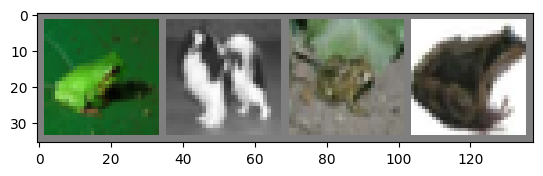

rana  perro rana  rana 


In [10]:
import random

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Obtener 4 índices aleatorios para seleccionar imágenes
random_indices = random.sample(range(len(trainset)), 4)
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Obtener las imágenes y etiquetas correspondientes a los índices aleatorios
random_images = [trainset[i][0] for i in random_indices]
random_labels = [trainset[i][1] for i in random_indices]

# Mostrar las 4 imágenes aleatorias
imshow(torchvision.utils.make_grid(random_images))
# Imprimir etiquetas de las imágenes aleatorias
print(' '.join(f'{classes[random_labels[j]]:5s}' for j in range(4)))

##### 9. Save the model in our local folder:

In [11]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

##### 10. Load the model to testing and visualize any results:

In [12]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [13]:
outputs = net(images)

In [14]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  perro camion camion ciervo


In [15]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 63 %


In [16]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: avion is 70.1 %
Accuracy for class: automovil is 77.0 %
Accuracy for class: pajaro is 42.9 %
Accuracy for class: gato  is 52.2 %
Accuracy for class: ciervo is 54.9 %
Accuracy for class: perro is 48.7 %
Accuracy for class: rana  is 72.7 %
Accuracy for class: caballo is 69.3 %
Accuracy for class: barco is 70.5 %
Accuracy for class: camion is 73.3 %


##### 11. The general result is not suitable to ou picture classifier.

### Conclusions

* In general, you can see the poor performance of our deep learning model and the expensive time execution in a local machine.
* Understand the needed of implement the same algorithm into a powerful machine with more hardware resources like GPU, CPU units and parallel and distributed training deep learning models through on-cloud services like Azure.
